# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 585


In [3]:
sorted_cities=sorted(cities)
print(sorted_cities)

['aasiaat', 'aberystwyth', 'abrau-dyurso', 'acatic', 'adrar', 'aginskoye', 'ahipara', 'ahvaz', 'airai', 'aklavik', 'aksarka', 'alanya', 'albany', 'alice springs', 'aliganj', 'alofi', 'alta floresta', 'amambai', 'ambon', 'amderma', 'amparafaravola', 'ancud', 'andapa', 'andenes', 'aracati', 'aracoiaba', 'aranda de duero', 'armidale', 'arraial do cabo', 'asau', 'asnaes', 'astoria', 'atar', 'atasu', 'attawapiskat', 'atuona', 'avarua', 'avera', 'ayan', 'azrow', 'bababe', 'babanusah', 'bambamarca', 'bambous virieux', 'banda aceh', 'bandar-e lengeh', 'bandarbeyla', 'banepa', 'bara', 'bardiyah', 'barentsburg', 'barrow', 'basco', 'bathsheba', 'batouri', 'baturaja', 'bay city', 'baykit', 'bellevue', 'belmonte', 'belushya guba', 'belyy yar', 'bengkulu', 'benguela', 'bethel', 'bilibino', 'bluff', 'boa vista', 'bongandanga', 'bonthe', 'borgarnes', 'bousso', 'bowen', 'brae', 'bredasdorp', 'brest', 'broken hill', 'brokopondo', 'broome', 'buala', 'buin', 'bundaberg', 'bur gabo', 'burgeo', 'burnie', 'b

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | chara
Processing Record 3 of Set 1 | nguiu
City not found. Skipping...
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | mareeba
Processing Record 13 of Set 1 | kargasok
Processing Record 14 of Set 1 | thinadhoo
Processing Record 15 of Set 1 | kamaishi
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | hun
Processing Record 21 of Set 1 | eskasem
City not found. Skipping...
Proce

Processing Record 39 of Set 4 | shiyan
Processing Record 40 of Set 4 | price
Processing Record 41 of Set 4 | cabra
Processing Record 42 of Set 4 | chicama
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | duvan
Processing Record 45 of Set 4 | buala
Processing Record 46 of Set 4 | turayf
Processing Record 47 of Set 4 | aasiaat
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | volsk
Processing Record 0 of Set 5 | rio grande
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | sakaiminato
Processing Record 3 of Set 5 | nizwa
Processing Record 4 of Set 5 | gayeri
Processing Record 5 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 6 of Set 5 | comodoro rivadavia
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | hualahuises
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | champerico
Processing Record 11 of Set 5 | torbay
Processing Recor

Processing Record 28 of Set 8 | harigue
City not found. Skipping...
Processing Record 29 of Set 8 | palu
Processing Record 30 of Set 8 | dujuma
City not found. Skipping...
Processing Record 31 of Set 8 | eisiskes
Processing Record 32 of Set 8 | rodeo
Processing Record 33 of Set 8 | boa vista
Processing Record 34 of Set 8 | todos santos
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | aberystwyth
Processing Record 37 of Set 8 | tolaga bay
Processing Record 38 of Set 8 | tidore
City not found. Skipping...
Processing Record 39 of Set 8 | kaitangata
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | aracati
Processing Record 42 of Set 8 | uige
Processing Record 43 of Set 8 | nautla
Processing Record 44 of Set 8 | matara
Processing Record 45 of Set 8 | chuy
Processing Record 46 of Set 8 | zhangye
Processing Record 47 of Set 8 | ayan
Processing Record 48 of Set 8 | itaituba
Processing Record 49 of Set 8 | armidale
Processing Record 0 of Set

Processing Record 11 of Set 12 | katsuura
Processing Record 12 of Set 12 | putina
Processing Record 13 of Set 12 | deputatskiy
Processing Record 14 of Set 12 | dudinka
Processing Record 15 of Set 12 | portland
Processing Record 16 of Set 12 | turka
Processing Record 17 of Set 12 | bardiyah
Processing Record 18 of Set 12 | bay city
Processing Record 19 of Set 12 | egersund
Processing Record 20 of Set 12 | daman
Processing Record 21 of Set 12 | quatre cocos
Processing Record 22 of Set 12 | saint george
Processing Record 23 of Set 12 | zangakatun
Processing Record 24 of Set 12 | wanning
Processing Record 25 of Set 12 | borgarnes
Processing Record 26 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 12 | rovaniemi
Processing Record 28 of Set 12 | tuy hoa
Processing Record 29 of Set 12 | harper
Processing Record 30 of Set 12 | nova olimpia
Processing Record 31 of Set 12 | bundaberg
Processing Record 32 of Set 12 | hualmay
Processing Record 33 of Set 12 | benguela


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
#print(city_data)

City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lata,40.1629,-8.3327,12.18,89,86,0.58,PT,1681092990
1,chara,56.9064,118.2631,-8.83,73,100,0.87,RU,1681092402
2,nanortalik,60.1432,-45.2371,-2.55,95,99,2.43,GL,1681092992
3,new norfolk,-42.7826,147.0587,12.18,61,100,1.79,AU,1681092992
4,margate,51.3813,1.3862,12.15,73,100,3.58,GB,1681092993


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lata,40.1629,-8.3327,12.18,89,86,0.58,PT,1681092990
1,chara,56.9064,118.2631,-8.83,73,100,0.87,RU,1681092402
2,nanortalik,60.1432,-45.2371,-2.55,95,99,2.43,GL,1681092992
3,new norfolk,-42.7826,147.0587,12.18,61,100,1.79,AU,1681092992
4,margate,51.3813,1.3862,12.15,73,100,3.58,GB,1681092993


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

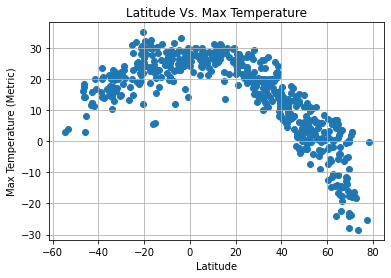

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Metric)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

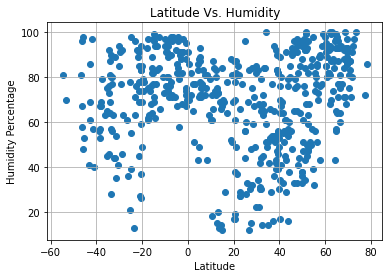

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity Percentage')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

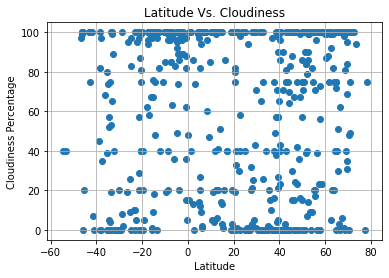

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness Percentage')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

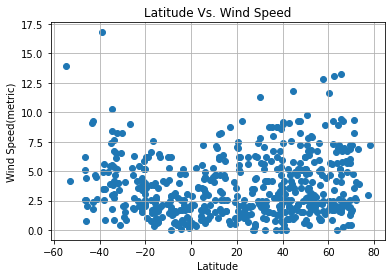

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(metric)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.46
The r-value is: 0.00
The r-value is: 0.00
The r-value is: 0.01


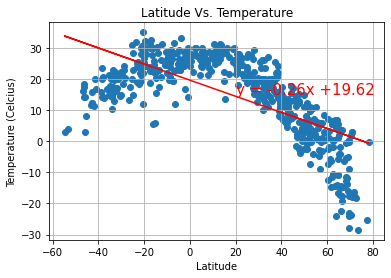

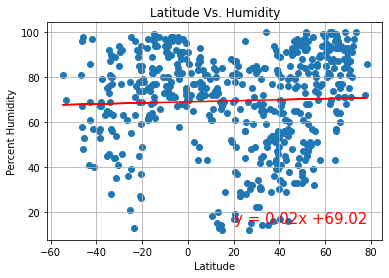

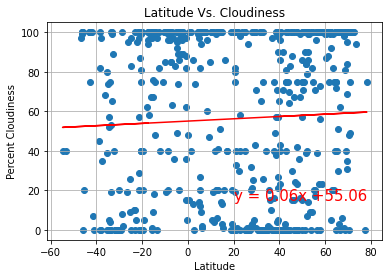

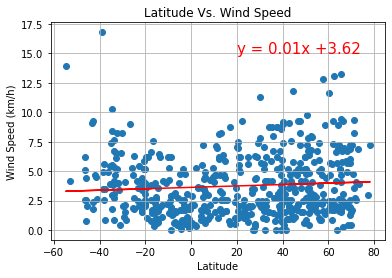

In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = [city_data_df['Max Temp'], city_data_df['Humidity'],city_data_df['Cloudiness'], city_data_df['Wind Speed']]
ylabel = ['Temperature (Celcius)', 'Percent Humidity', 'Percent Cloudiness', 'Wind Speed (km/h)']
title = ['Latitude Vs. Temperature', 'Latitude Vs. Humidity', 'Latitude Vs. Cloudiness', 'Latitude Vs. Wind Speed']

for i in range(len(y_values)):
    def line_regress(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values[i])
        regress_values = x_values * slope + intercept
        
        fig, ax = plt.subplots()
        plt.scatter(x_values, y_values[i], marker='o')
        plt.plot(x_values, regress_values, "r-")
        line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
        
        plt.title(title[i])
        plt.xlabel('Latitude')
        plt.ylabel(ylabel[i])
        plt.grid(True)
        plt.annotate(line_eq,(20,15),fontsize=15,color="red")
        
        print(f"The r-value is: {rvalue**2:.2f}")
        
    line_regress(x_values, y_values)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lata,40.1629,-8.3327,12.18,89,86,0.58,PT,1681092990
1,chara,56.9064,118.2631,-8.83,73,100,0.87,RU,1681092402
2,nanortalik,60.1432,-45.2371,-2.55,95,99,2.43,GL,1681092992
4,margate,51.3813,1.3862,12.15,73,100,3.58,GB,1681092993
10,kargasok,59.0556,80.8572,0.41,99,100,4.45,RU,1681092996


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,new norfolk,-42.7826,147.0587,12.18,61,100,1.79,AU,1681092992
5,hobart,-42.8794,147.3294,12.37,69,75,9.26,AU,1681092848
6,saint-philippe,-21.3585,55.7679,23.77,85,100,4.43,RE,1681092994
7,puerto ayora,-0.7393,-90.3518,26.97,88,82,0.45,EC,1681092994
8,bluff,-46.6000,168.3333,16.18,81,97,6.17,NZ,1681092995


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7955715674116225


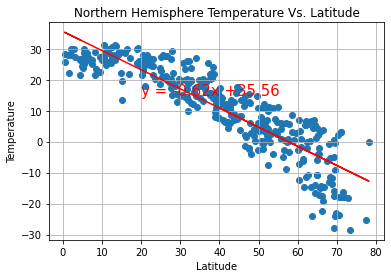

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.38537504881775114


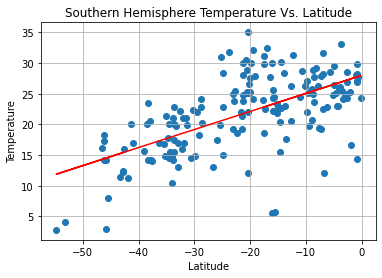

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Cities nearer the equator will have higher temperatures and you can see temperature has an opposite reactions to distancing the equator in the northern and southern hemispheres. The r values in each scenario indicates strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08661351540799928


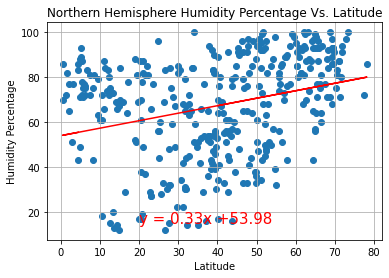

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Humidity Percentage Vs. Latitude')
plt.ylabel('Humidity Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.128099148246787


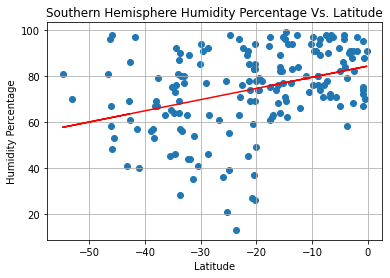

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Humidity Percentage Vs. Latitude')
plt.ylabel('Humidity Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Neither hemisphere have a strong correlation as seen on the graph and further proved by the r value and linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.027168702064855065


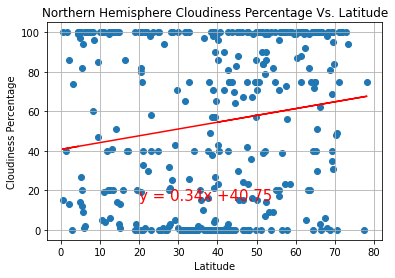

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Cloudiness Percentage Vs. Latitude')
plt.ylabel('Cloudiness Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.07204311960234575


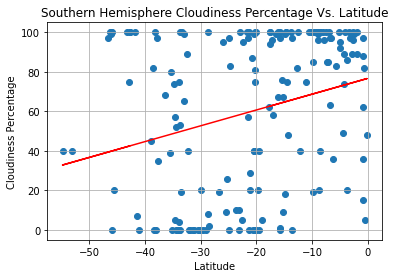

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Cloudiness Percentage Vs. Latitude')
plt.ylabel('Cloudiness Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Similarly with humidity, it can clearly be seen that cloudiness and latitude do not have a strong correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02489096723870034


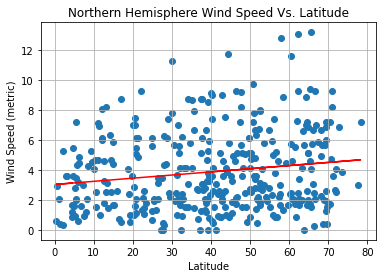

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed (metric)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.19588160382449518


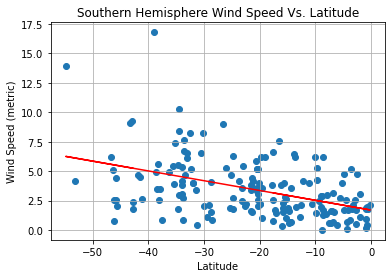

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed (metric)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** It can be argued that there is yet again, not a ctrong correlation between wind speed and latitude of a certain city.